##  Import Libraries

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('welddatabase/welddb_new.csv' )
df.head()


,Carbon_%,Silicon_%,Manganese_%,Sulphur_%,Phosphorus_%,Nickel_%,Chromium_%,Molybdenum_%,Vanadium_%,Copper_%,...,Weld_Type_GMAA,Weld_Type_GTAA,Weld_Type_MMA,Weld_Type_NGGMA,Weld_Type_NGSAW,Weld_Type_SA,Weld_Type_SAA,Weld_Type_ShMA,Weld_Type_TSA,Heat_Input_J_mm
0,0.037,0.30,0.65,0.008,0.012,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1000.0
1,0.037,0.30,0.65,0.008,0.012,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1000.0
2,0.037,0.30,0.65,0.008,0.012,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1000.0
3,0.037,0.31,1.03,0.007,0.014,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1000.0
4,0.037,0.31,1.03,0.007,0.014,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1000.0


| Type                              | Column Examples                                                            | Physical Role                                                   |
| --------------------------------- | -------------------------------------------------------------------------- | --------------------------------------------------------------- |
| **Chemical (wt%)**                | C, Si, Mn, Ni, Cr, Mo, V, Cu, Co, W, Ti, Nb, B, N, O, S, P, Al, Sn, As, Sb | Determine microstructure, strength, and toughness               |
| **Process Parameters**            | Heat_Input_J_mm, Interpass_Temp_C, PWHT_Temp_C, PWHT_Time_hours, Power_W   | Control cooling rate and phase transformations                  |
| **Metallographic (% phase)**      | Primary_Ferrite_%, Acicular_Ferrite_%, Martensite_%, etc.                  | Indicate the type of microstructure obtained                    |
| **Polarity / Weld Type**          | Electrode_Polarity_+, Weld_Type_MMA, etc.                                  | Binary categorical variables for the welding process            |
| **Mechanical Targets**            | YS, UTS, Elongation, Reduction_Area, Charpy_Energy_J, FATT_50%, Hardness   | Measure the final quality of the weld                           |


In [5]:
float_columns = df.select_dtypes(include=['float64']).columns
int_columns = df.select_dtypes(include=['int64']).columns

In [6]:
float_columns

Index(['Carbon_%', 'Silicon_%', 'Manganese_%', 'Sulphur_%', 'Phosphorus_%',
       'Nickel_%', 'Chromium_%', 'Molybdenum_%', 'Vanadium_%', 'Copper_%',
       'Cobalt_%', 'Tungsten_%', 'Oxygen_weight%', 'Titanium_weight%',
       'Nitrogen_weight%', 'Aluminium_weight%', 'Boron_weight%',
       'Niobium_weight%', 'Tin_weight%', 'Arsenic_weight%', 'Antimony_weight%',
       'Interpass_Temp_C', 'PWHT_Temp_C', 'PWHT_Time_hours',
       'Yield_Strength_MPa', 'UTS_MPa', 'Elongation_%', 'Reduction_Area_%',
       'Charpy_Temp_C', 'Charpy_Energy_J', 'Hardness_kg_mm2', 'FATT_50%',
       'Primary_Ferrite_%', 'Ferrite_2nd_Phase_%', 'Acicular_Ferrite_%',
       'Martensite_%', 'Ferrite_Carbide_%', 'Power_W', 'Heat_Input_J_mm'],
      dtype='object')

In [7]:
int_columns


Index(['Electrode_Polarity_+', 'Electrode_Polarity_-', 'Electrode_Polarity_0',
       'Weld_Type_FCA', 'Weld_Type_GMAA', 'Weld_Type_GTAA', 'Weld_Type_MMA',
       'Weld_Type_NGGMA', 'Weld_Type_NGSAW', 'Weld_Type_SA', 'Weld_Type_SAA',
       'Weld_Type_ShMA', 'Weld_Type_TSA'],
      dtype='object')

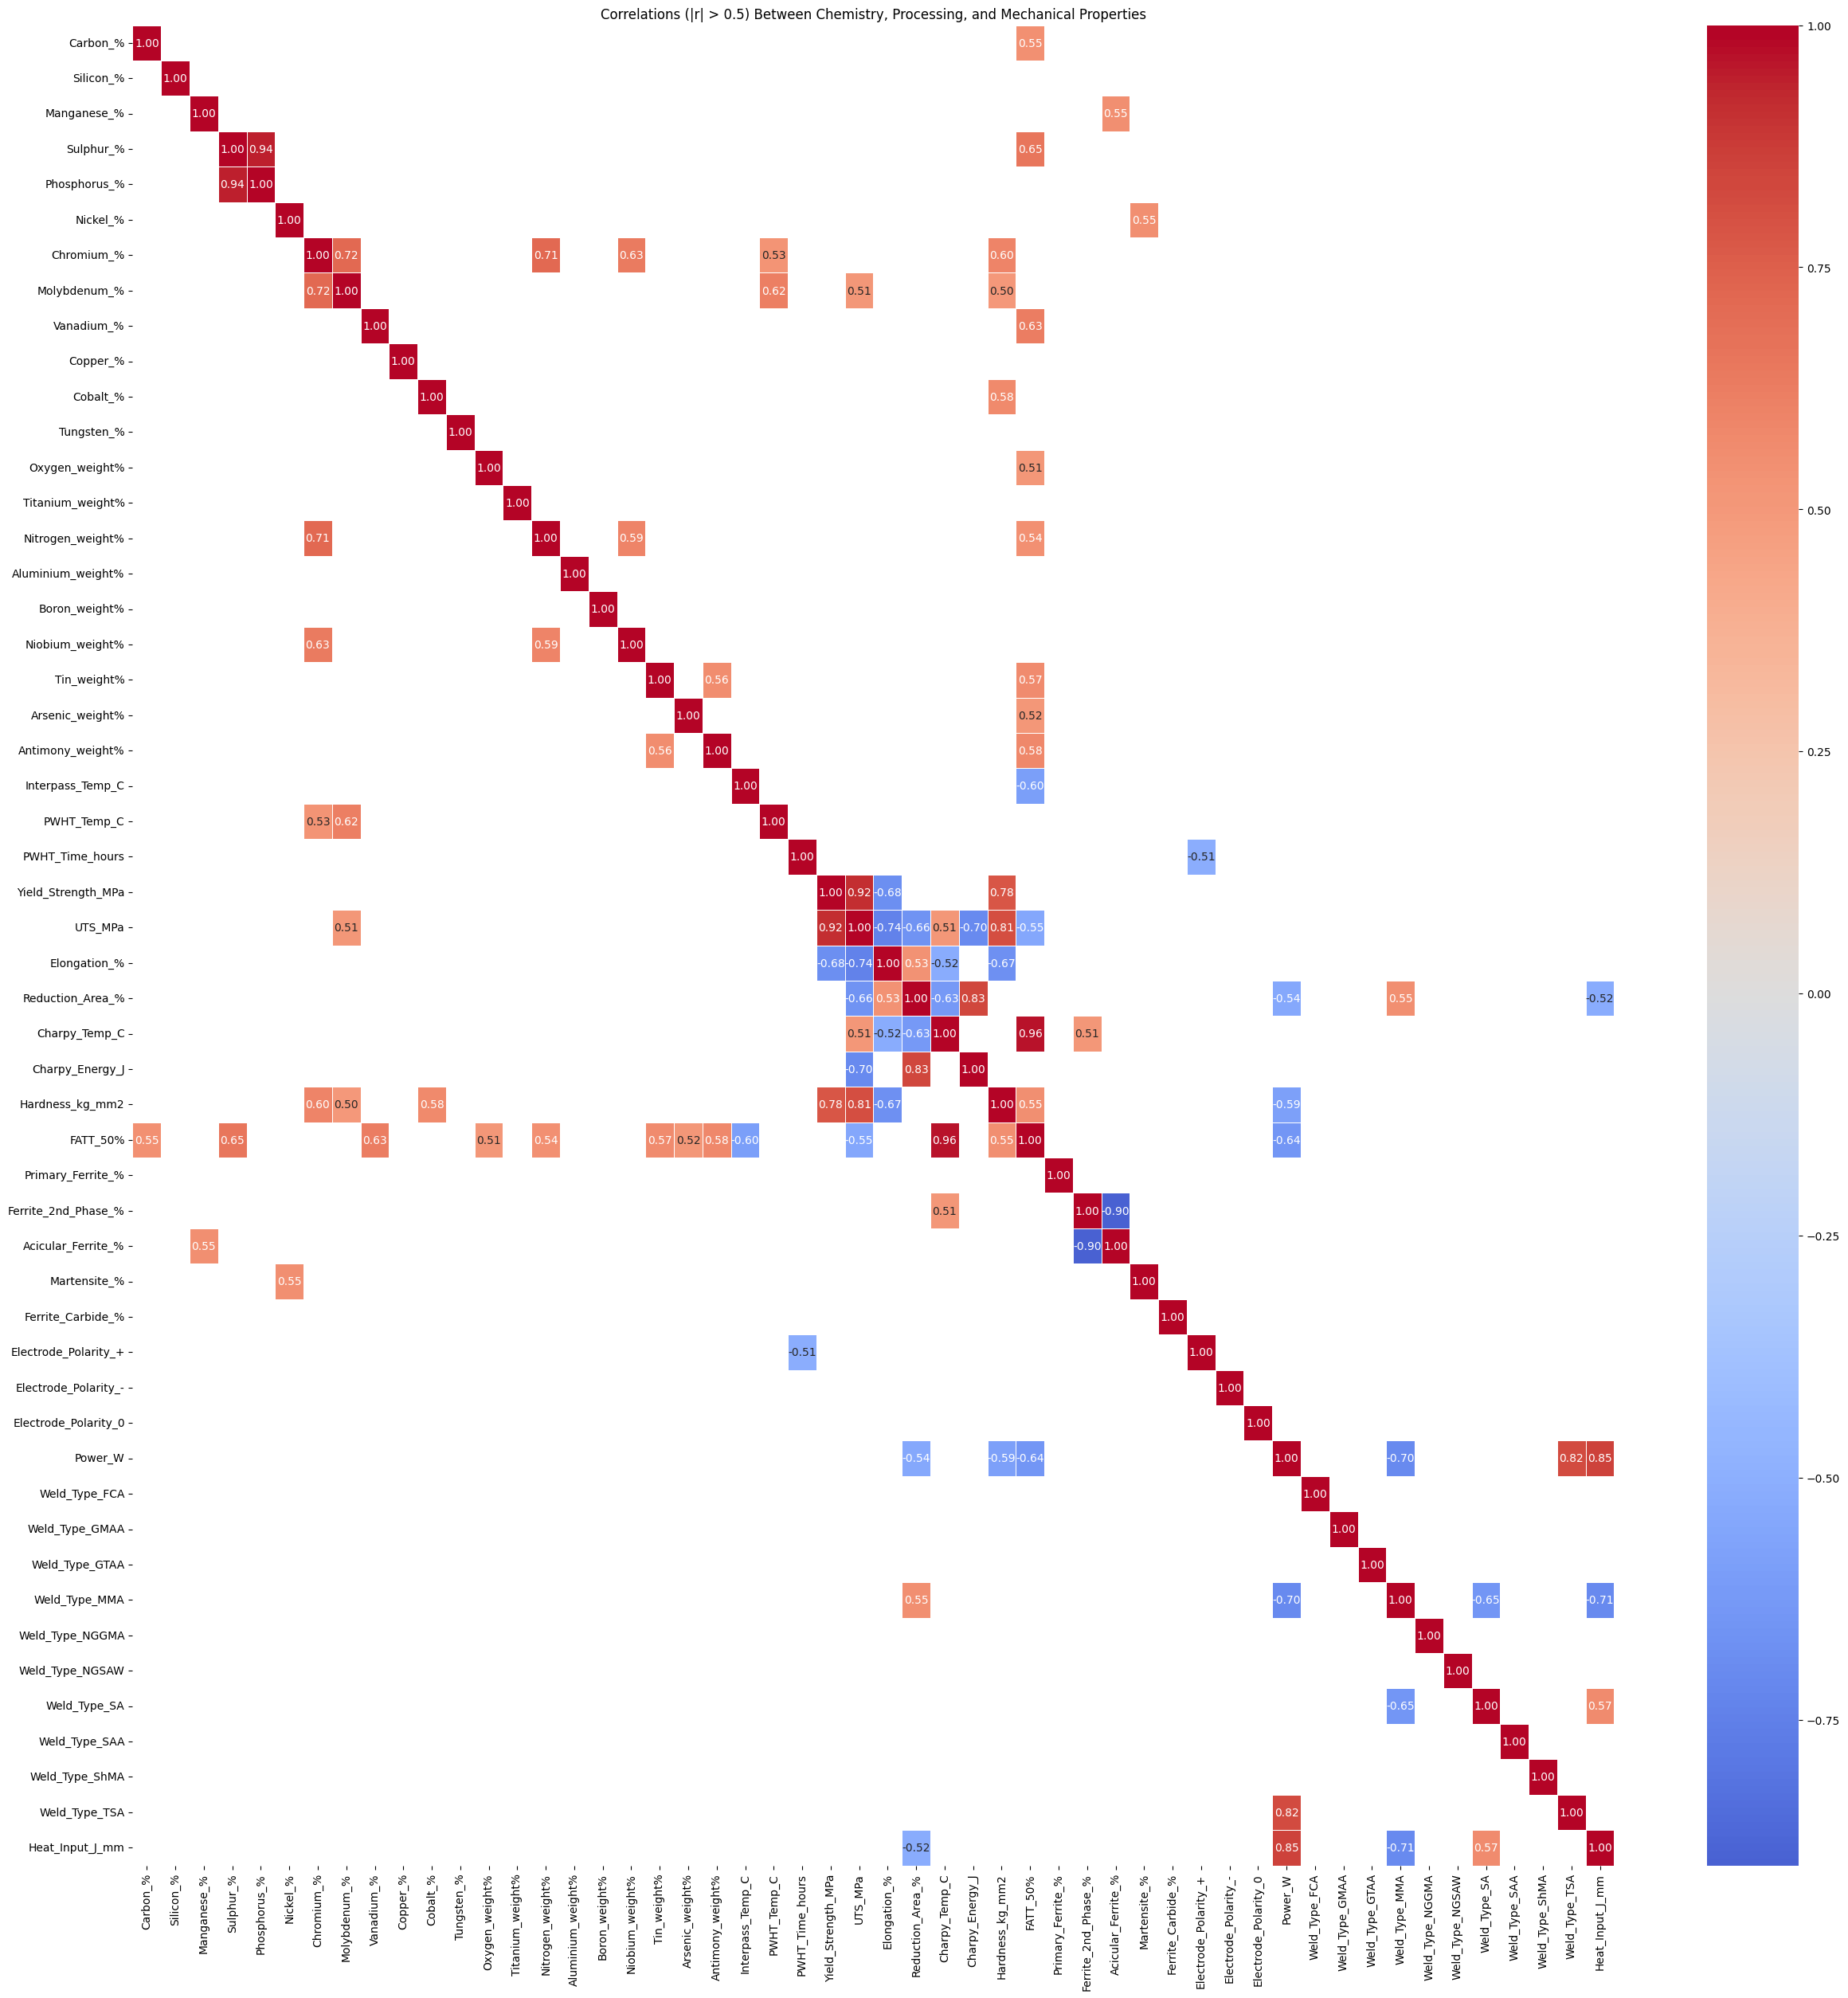

In [8]:
corr = df.corr(numeric_only=True)
corr_filtered1 = corr.where(abs(corr) > 0.5)
plt.figure(figsize=(30, 30))
sns.heatmap(corr_filtered1, cmap="coolwarm", center=0, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlations (|r| > 0.5) Between Chemistry, Processing, and Mechanical Properties")
plt.show()

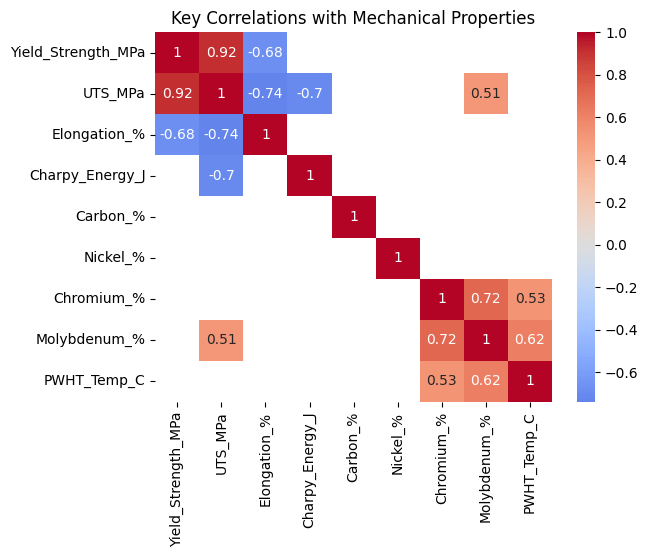

In [9]:
corr_targets = df[[
    "Yield_Strength_MPa","UTS_MPa","Elongation_%","Charpy_Energy_J",
    "Carbon_%","Nickel_%","Chromium_%","Molybdenum_%","PWHT_Temp_C"
]].corr()
corr_filtered2=corr_targets.where(abs(corr) > 0.5)
sns.heatmap(corr_filtered2, annot=True, cmap="coolwarm", center=0)
plt.title("Key Correlations with Mechanical Properties")
plt.show()

# Interpretation 
### 1. **Sulphur (%) and Phosphorus (%) → r = +0.94**

These two  elements exhibit the **strongest chemical correlation** in the dataset.

**Physical meaning:**
Sulphur and phosphorus are both residual elements from steelmaking and are rarely added intentionally. They tend to appear together because they originate from the same refining and deoxidation limitations.

**Weld quality implication:**
High S and P levels are harmful — they promote **hot cracking** and **reduce toughness**. Their strong correlation indicates that weld cleanliness must be controlled for both elements simultaneously.


### 2. **Heat_Input_J_mm and Power_W → r = +0.85**

A strong positive correlation exists between the **heat input per unit length** and **welding power**.

**Physical meaning:**
This is a **process-based relationship**: heat input is directly derived from welding power, voltage, and travel speed. Higher power naturally increases the energy deposited in the weld.

**Weld quality implication:**
Higher heat input → slower cooling rate → coarser grains → **lower strength but improved ductility**.
This correlation confirms the dataset’s physical consistency between process parameters.

### 3. **Type_of_Weld_TSA and Power_W → r = +0.82**

The **TSA welding process type** (Tungsten Shielded Arc, or a similar arc process) is strongly correlated with higher **power levels**.

**Physical meaning:**
Certain welding methods, such as TSA or SAW, use **higher current and power** compared to manual or low-energy processes.
This correlation reflects the **typical power range associated with that welding technique**.

**Weld quality implication:**
These processes generate high heat input, producing **softer, more ductile welds**, but require control to prevent over-grain growth or toughness loss.


### 4. **Type_of_Weld_MMA and Power_W → r = –0.70**

Manual Metal Arc (MMA) welding shows a **strong negative correlation** with **power**.

**Physical meaning:**
MMA is a **low-power, manual process** — it operates at much lower currents compared to automatic, high-power techniques (like TSA or SAW).
Hence, as power increases, MMA use decreases, and vice versa.

**Weld quality implication:**
MMA welds usually have **faster cooling rates** and **finer microstructures**, resulting in **higher strength but lower ductility**.
This negative correlation reflects a realistic contrast between manual and high-energy automatic processes.


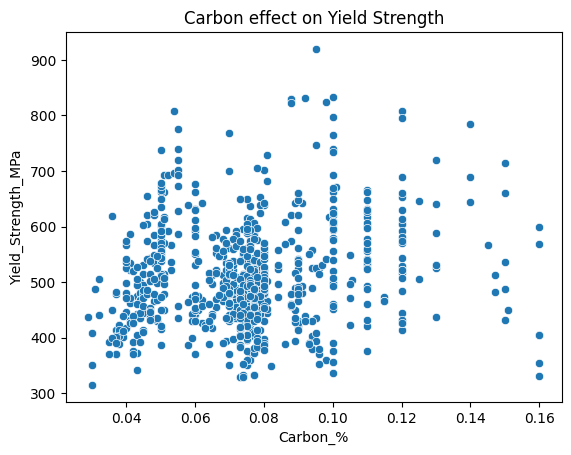

In [10]:
sns.scatterplot(x="Carbon_%", y="Yield_Strength_MPa", data=df)
plt.title("Carbon effect on Yield Strength")
plt.show()


This scatter plot shows that **Yield Strength increases with Carbon content**, confirming the classic strengthening effect of carbon in steels. As carbon rises from about 0.03% to 0.12%, most data points shift upward from roughly 400 MPa to over 700 MPa. This occurs because carbon enhances solid-solution and martensitic hardening in the weld metal. However, the scatter at higher carbon levels also suggests diminishing returns and potential loss of ductility or weld toughness when carbon becomes excessive consistent with the metallurgical balance needed for high-quality welds.


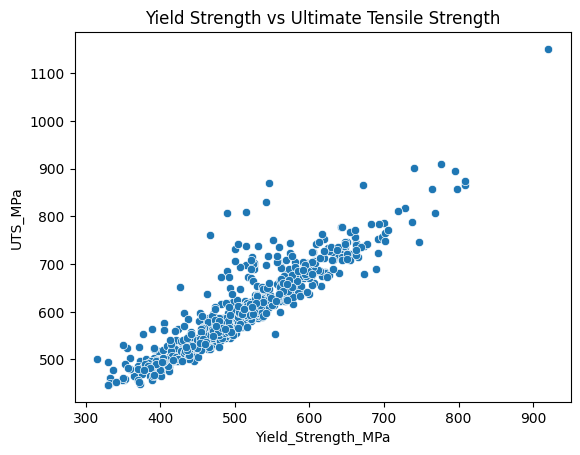

In [11]:
sns.scatterplot(x="Yield_Strength_MPa", y="UTS_MPa", data=df)
plt.title("Yield Strength vs Ultimate Tensile Strength")
plt.show()


This scatter plot reveals a strong linear relationship between Yield Strength (YS) and Ultimate Tensile Strength (UTS). As YS increases from about 300 MPa to 800 MPa, UTS rises almost proportionally from roughly 450 MPa to over 900 MPa. This indicates that both properties are controlled by the same strengthening mechanisms, primarily alloy composition and heat treatment. The tight clustering of points shows consistent mechanical behavior across welds, confirming data reliability. In terms of weld quality, this correlation suggests that welds with higher YS maintain proportional tensile strength.

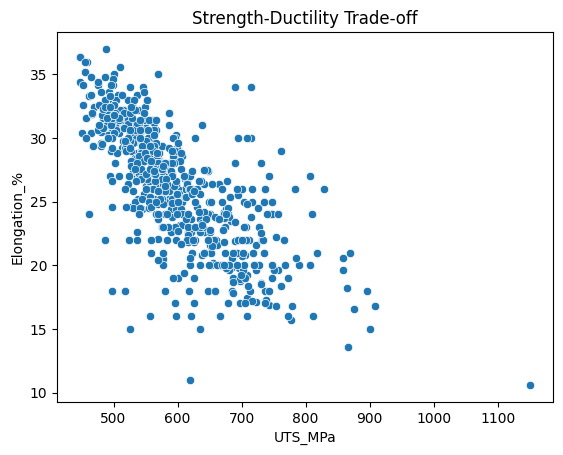

In [12]:
sns.scatterplot(x="UTS_MPa", y="Elongation_%", data=df)
plt.title("Strength-Ductility Trade-off")
plt.show()


This plot clearly illustrates the strength–ductility trade-off: as Ultimate Tensile Strength (UTS) increases, elongation (%) decreases. Welds with UTS around 500–600 MPa exhibit high ductility (above 30 %), while those exceeding 800 MPa show much lower elongation (below 20 %). This inverse trend reflects the typical behavior of steels—strengthening mechanisms such as solid-solution hardening, martensitic transformation, or finer microstructures restrict plastic deformation. In terms of weld quality, this graph highlights that maximizing strength often compromises ductility; therefore, optimal welds achieve a balance, maintaining sufficient elongation for toughness while ensuring adequate strength for load-bearing capacity.

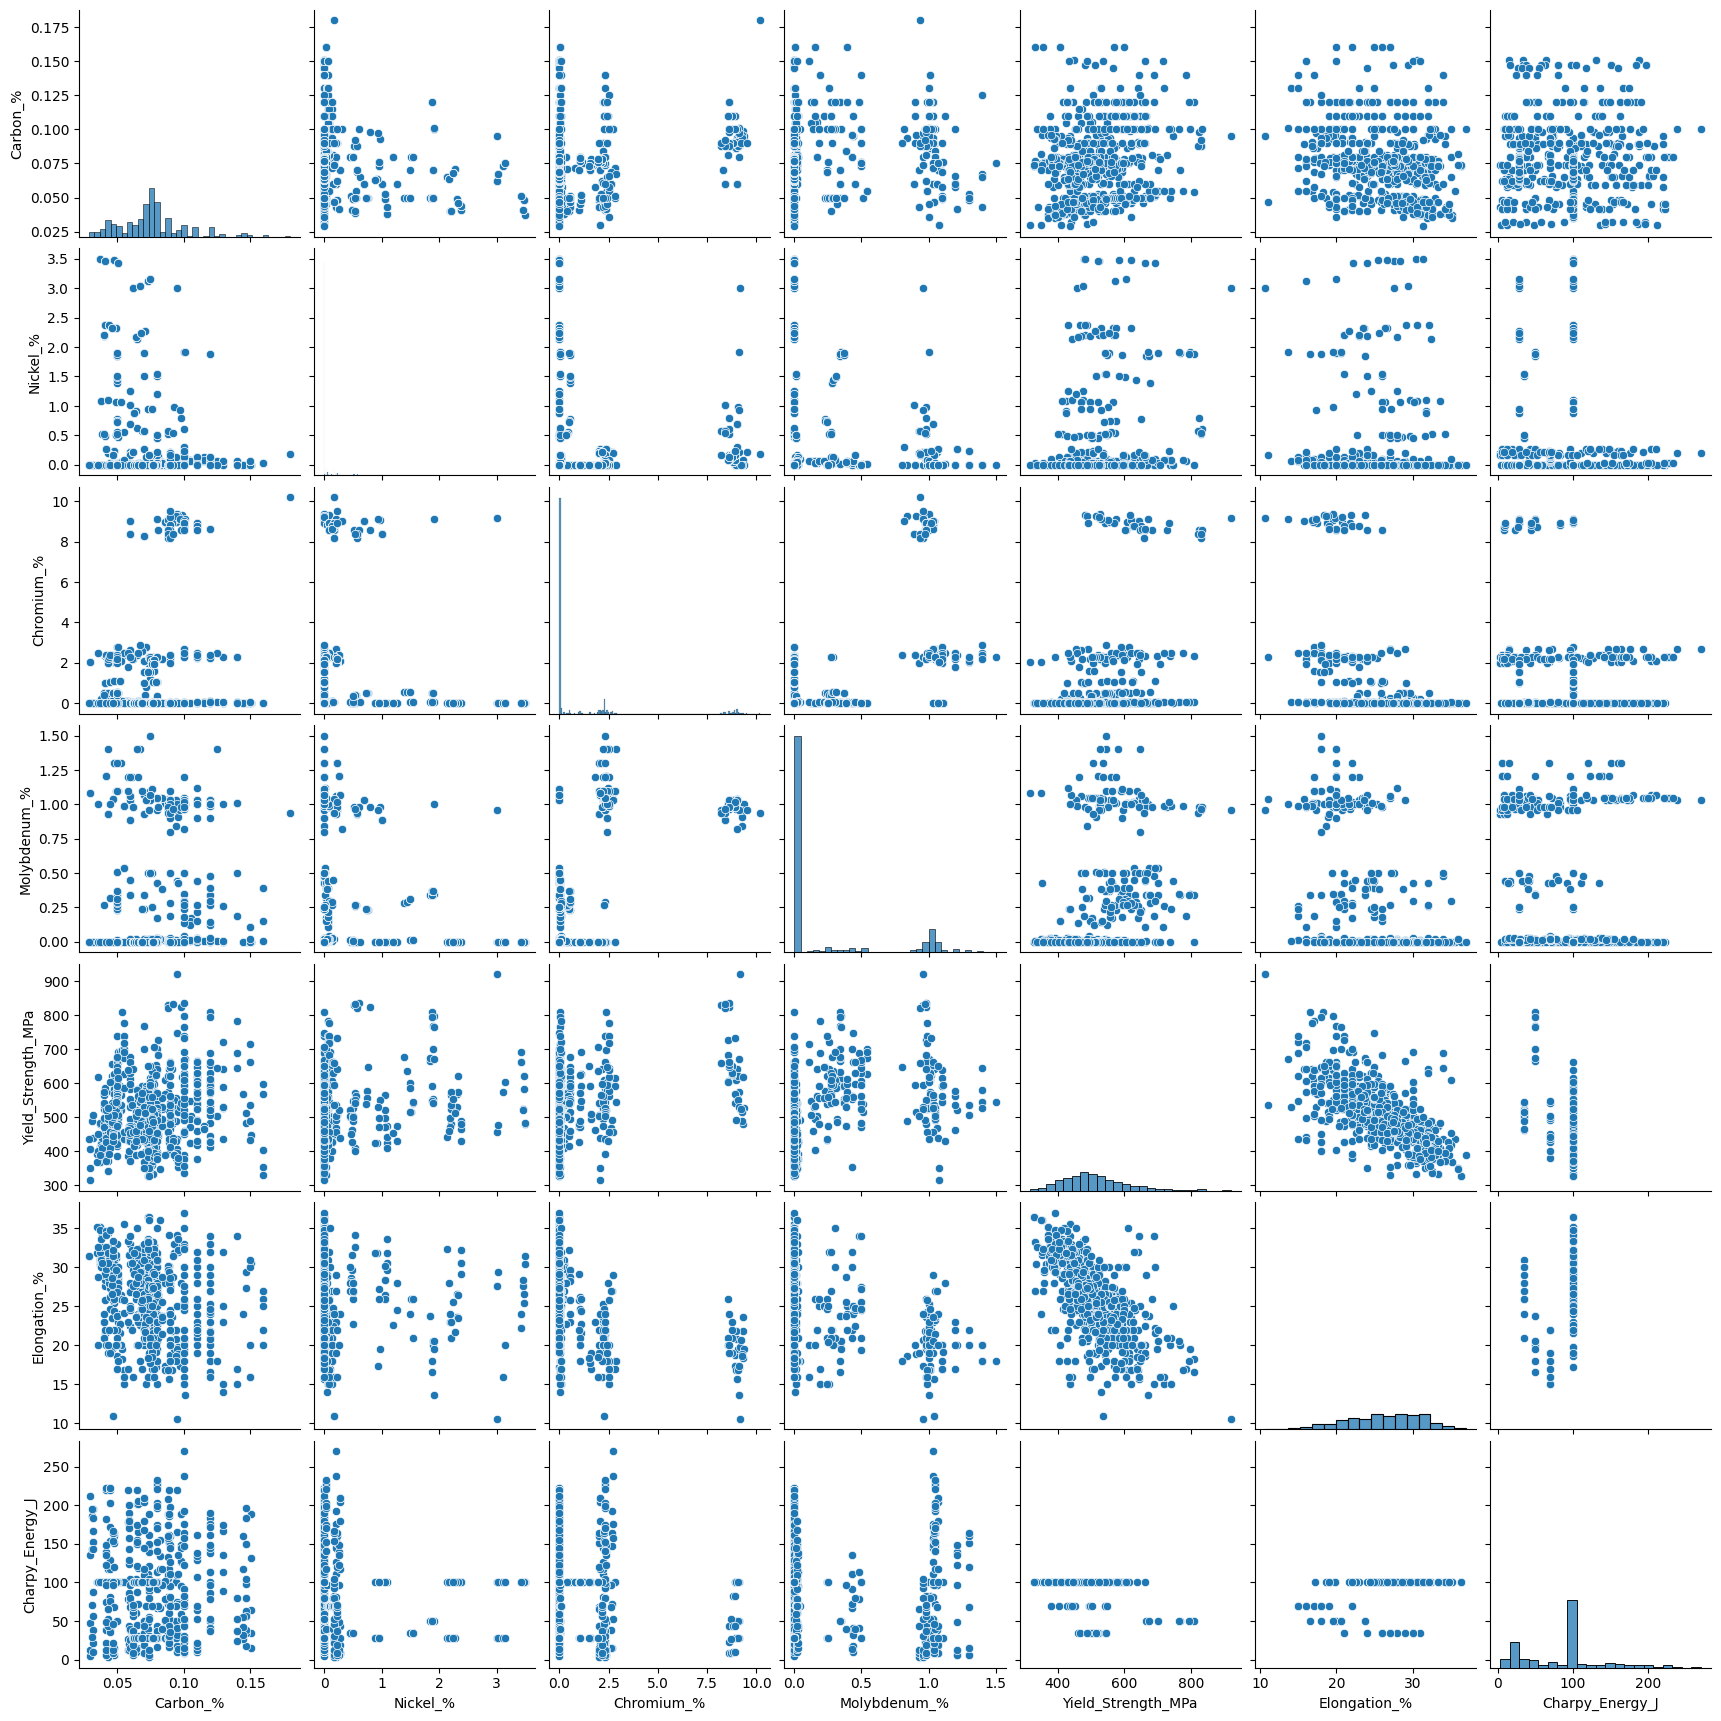

In [13]:
sns.pairplot(df[[
    "Carbon_%","Nickel_%","Chromium_%","Molybdenum_%",
    "Yield_Strength_MPa","Elongation_%","Charpy_Energy_J"
]])
plt.show()


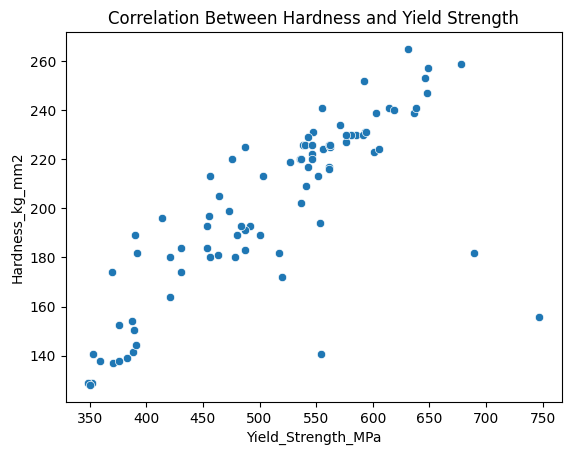

In [14]:
sns.scatterplot(x="Yield_Strength_MPa", y="Hardness_kg_mm2", data=df)
plt.title("Correlation Between Hardness and Yield Strength")
plt.show()


This plot shows a clear **positive correlation between Hardness and Yield Strength**: as Yield Strength increases from about 350 to 700 MPa, hardness rises from roughly 130 to 260 kg/mm². This aligns with the **Tabor relation** (H ≈ 3 × σ_y), confirming that both properties are governed by the same strengthening mechanisms such as carbon content and heat treatment. In terms of weld quality, this indicates that measuring hardness provides a reliable indirect estimate of strength, and welds with moderate hardness typically offer a good balance between strength and toughness.


## Missing Values 

In [15]:
missing_values = df.isnull().sum()

missing_values[missing_values > 0]

PWHT_Temp_C              13
PWHT_Time_hours          13
Yield_Strength_MPa      872
UTS_MPa                 914
Elongation_%            952
Reduction_Area_%        947
Charpy_Temp_C           773
Charpy_Energy_J         773
Hardness_kg_mm2        1514
FATT_50%               1621
Primary_Ferrite_%      1554
Ferrite_2nd_Phase_%    1562
Acicular_Ferrite_%     1562
Martensite_%           1563
Ferrite_Carbide_%      1563
Power_W                 248
dtype: int64

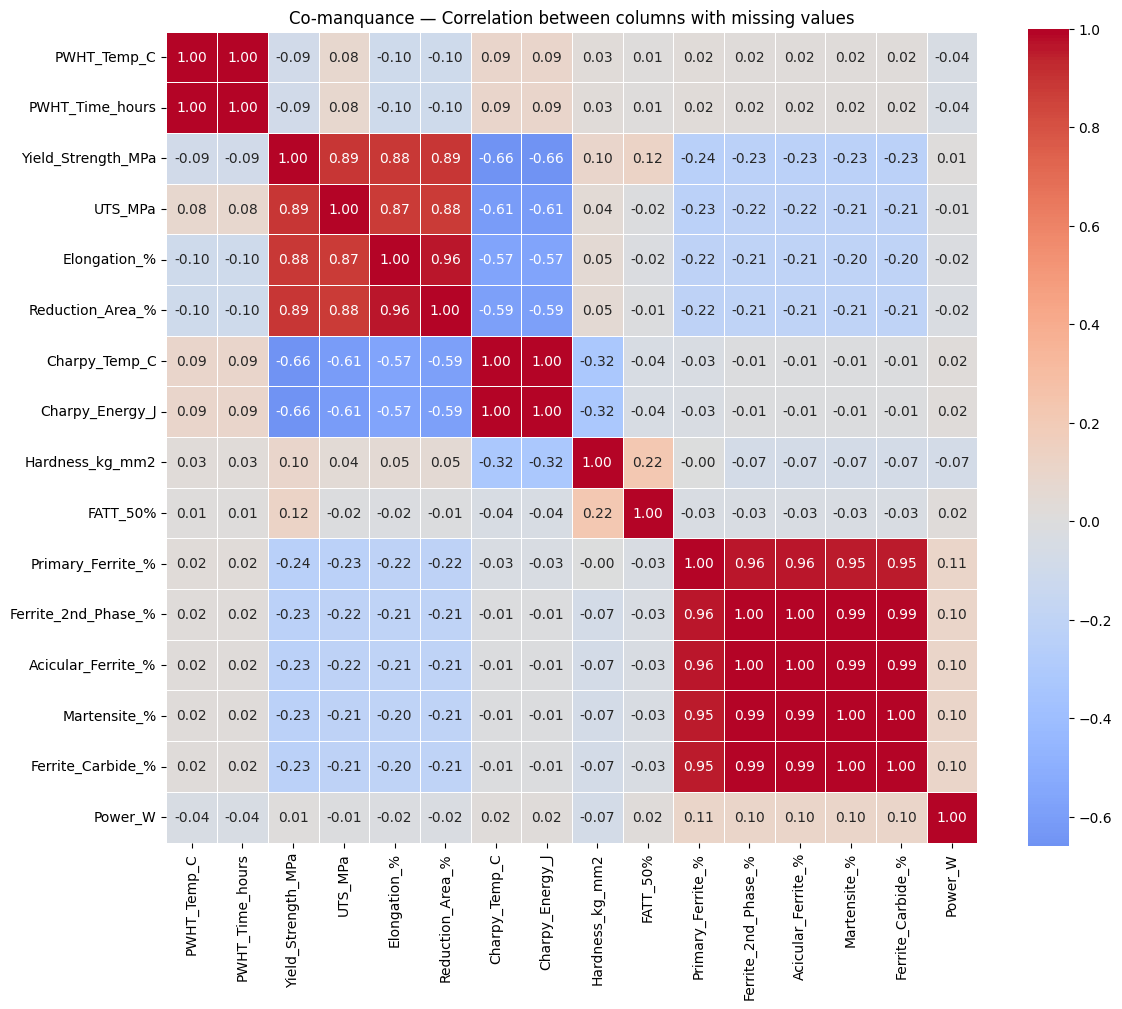

In [26]:
cols_with_missing = df.columns[df.isna().any()].tolist()
missing_flags = df[cols_with_missing].isna().astype(int)
corr_missing = missing_flags.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_missing,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    center=0,
    square=True,
    linewidths=0.5)
plt.title("Co-manquance — Correlation between columns with missing values")
plt.tight_layout()
plt.show()

| **Group / Column(s)**                                                                                           | **Observed correlation pattern**                                | **Likely missingness type** | **Dependence / cause hypothesis**                                                                                                                                | **Imputation technique**                                                                                       |
| --------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------- | --------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------- |
| **PWHT_Temp_C** and **PWHT_Time_hours**                                                                         | Correlation = **1.00**                                          | **MAR** (Missing At Random) | Missing together → indicates a *process step not performed* (no post-weld heat treatment).                                                                       | Joint imputation (e.g. **KNN** or **multivariate regression**) using welding parameters like `Power_W`, `Heat_input`, etc. |
| **Yield_Strength_MPa**, **UTS_MPa**, **Elongation_%**, **Reduction_Area_%**                                     | Strong inter-correlations (**0.87–0.96**)                       | **MAR**                     | These mechanical properties are measured in the same test campaign; if one is missing, the tensile test was likely skipped.                                      | **Multivariate imputation** (MICE) or regression imputation using related mechanical and processing variables.             |
| **Charpy_Temp_C** and **Charpy_Energy_J**                                                                       | Correlation = **1.00**                                          | **MAR**                     | These are paired test outputs; missing both means the Charpy test wasn’t done.                                                                                   | Keep as a **pair**, impute both jointly (KNN or regression) or mark as “test not performed.”                               |
| **Hardness_kg_mm2**                                                                                             | Weak to moderate correlation with tensile properties (**≈0.3**) | **MAR / borderline MCAR**   | Missing hardness often linked to incomplete mechanical characterization; partial test omission.                                                                  | **Regression** on other mechanical variables or **median** imputation if distribution is tight.                            |
| **FATT_50%**                                                                                                    | Very high missing rate (~98%), weak links to others             | **MCAR or MAR (unclear)**   | Could be missing because this test type is rare, not because of other measurements.                                                                              | Treat separately; either **remove** or impute with **constant “Not tested”** flag.                                         |
| **Primary_Ferrite_%**, **Ferrite_2nd_Phase_%**, **Acicular_Ferrite_%**, **Martensite_%**, **Ferrite_Carbide_%** | All inter-correlated (**>0.95**)                                | **MAR**                     | These are all **microstructure phase fractions**, typically measured together by metallography; missing jointly means the microstructure test was not performed. | Use **blockwise imputation** (MICE with grouping) or replace with “missing test” flags for tree models.                    |
| **Power_W**                                                                                                     | Very weak correlation with others                               | **MCAR**                    | Measurement from welding setup; missing randomly (instrument error or data entry).                                                                               | **Mean/median** imputation safe; or interpolation if time-series.                                                          |
